# Wetterstation Kloten

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from scipy.interpolate import interp1d

1. Import der Daten
   - Beschreibt die Datenstruktur.
   - Zeigt auf, wie viele Messungen es sind.

In [2]:
#load csv file
weather = np.loadtxt('Zürich21-22-GruppeG.csv', skiprows=1, delimiter=';', dtype=str)

#select data for Kloten
klo_weather = [row for row in weather if row[0] == 'KLO'] #klo_weather is a list of lists or Numpy array???


- #stn: Stationnummer oder ID der Wetterstation
- time: Zeitpunkt der Messung im Format JJJJMMDDhhmm
- prestah0: Luftdruck auf Stationshöhe (in hPa)
- tre200h0: Lufttemperatur in 2m Höhe (in Grad Celsius)
- rre150h0: Niederschlagssumme (in mm) der letzten 6 Minuten
- su2000h0: Sonnenscheindauer in Minuten der letzten Stunde
- time_diff: Zeitdifferenz zur vorigen Messung in Minuten

In [3]:
print("Anzahl Messungen:", len(klo_weather))


klo_weather_t = np.transpose(klo_weather)

#stn;time;prestah0;tre200h0;rre150h0;su2000h0;time_diff
#stn = klo_weather_t[0]
#time = klo_weather_t[1].astype.datetime
time = [datetime.strptime(t, '%Y-%m-%d %H:%M:%S') for t in klo_weather_t[1]]
prestah0 = klo_weather_t[2].astype(float)
tre200h0 = klo_weather_t[3].astype(float)
rre150h0 = klo_weather_t[4].astype(float)
su2000h0 = klo_weather_t[5].astype(float)
time_diff = klo_weather_t[6].astype(float)

Anzahl Messungen: 7473


2. Da einige Datenpunkte fehlen, müsst ihr diese interpolieren.
   - Wählt dazu eine geeignete Methode und begründet eure Wahl.
   - Führt die Methode durch, um eine interpolierte Version der Daten mit mindestens doppelt so vielen Punkten zu erzeugen.

In [4]:
time_diff_demo = time_diff[:25]
max_demo = int(np.max(time_diff_demo))
#print(max_demo)
#print(time_diff_demo)

#max = int(np.max(time_diff))
#print(max)

t_demo = np.linspace(0, max_demo, (2*max_demo))

#f_cubic = interpolate.interp1d(time_diff[:25], prestah0[:2], kind='cubic')
f_cubic = interp1d(time_diff, klo_weather_t[2:6], kind='cubic')
f_linear = interp1d(time_diff, klo_weather_t[2:6], kind = 'linear')

prestah0_inter, tre200h0_inter,rre150h0_inter, su2000h0_inter = f_cubic(t_demo)
prestah0_inter_linear, tre200h0_inter_linear,rre150h0_inter_linear, su2000h0_inter_linear = f_linear(t_demo)

klo_weather_t_inter = np.array([prestah0_inter, tre200h0_inter,rre150h0_inter, su2000h0_inter])

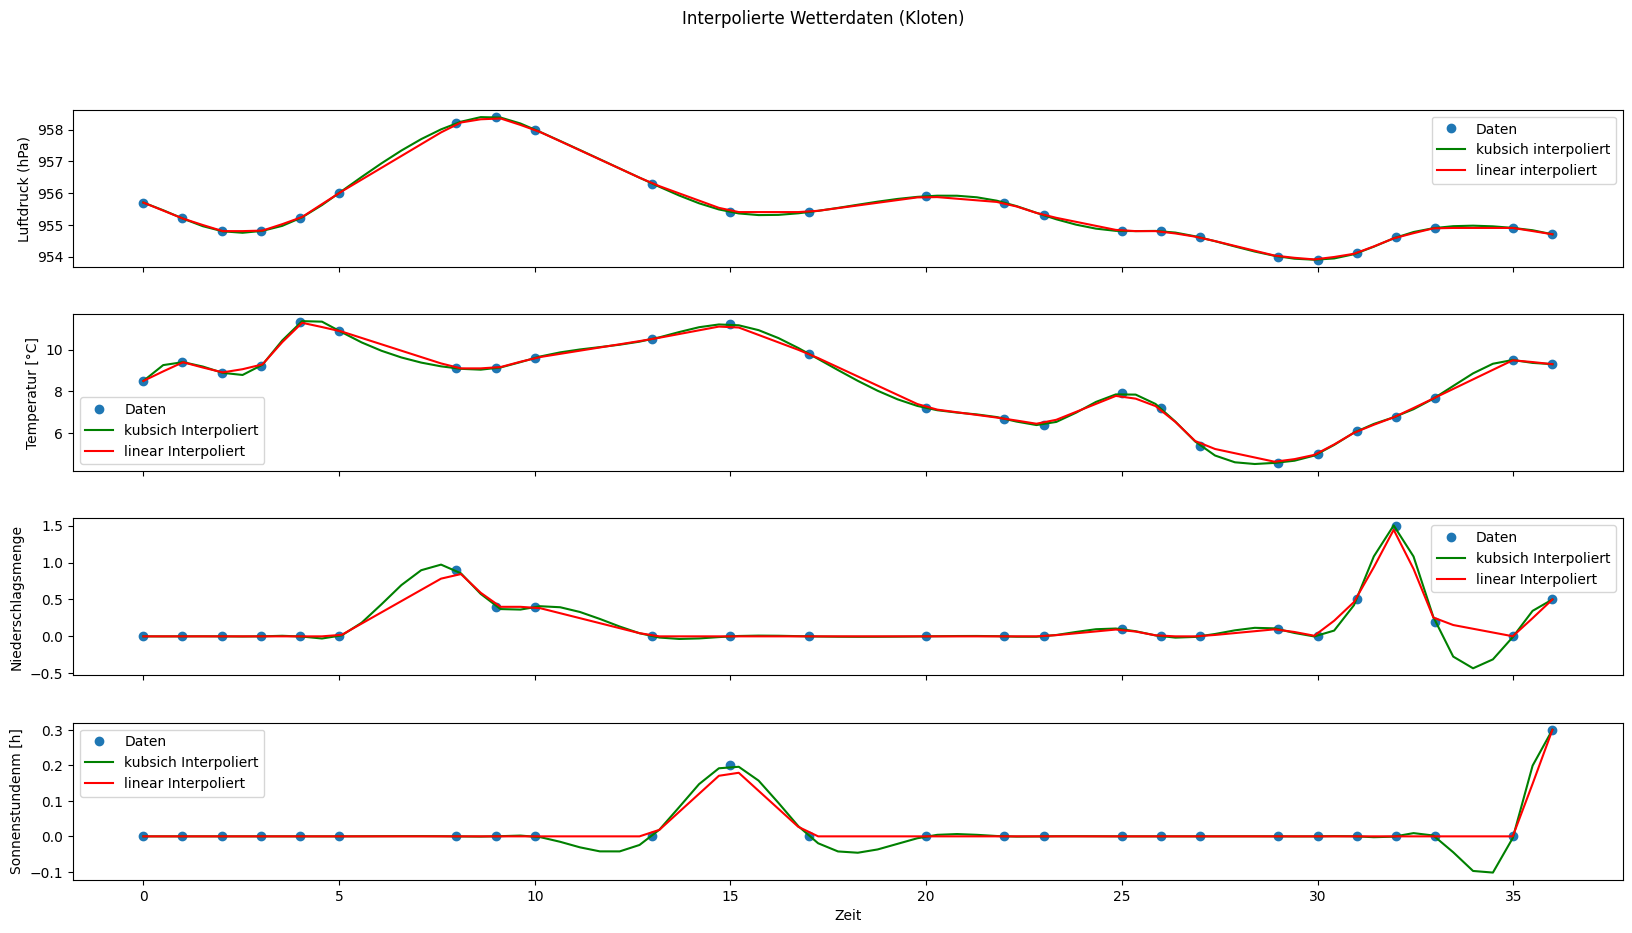

In [5]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True, figsize=(20,10))
fig.subplots_adjust(wspace=0.5, hspace=0.3)

ax1.plot(time_diff_demo, prestah0[:25], 'o', label='Daten')
ax1.plot(t_demo[0:2*max_demo], prestah0_inter[0:2*max_demo], 'g-', label='kubsich interpoliert')
ax1.plot(t_demo[0:2*max_demo], prestah0_inter_linear[0:2*max_demo], 'r-', label='linear interpoliert')
ax1.set_ylabel('Luftdruck (hPa)')
#ax1.set_xlabel('Zeit')
ax1.legend()

ax2.plot(time_diff_demo, tre200h0[:25], 'o', label='Daten')
ax2.plot(t_demo[0:2*max_demo], tre200h0_inter[0:2*max_demo], 'g-', label='kubsich Interpoliert')
ax2.plot(t_demo[0:2*max_demo], tre200h0_inter_linear[0:2*max_demo], 'r-', label='linear Interpoliert')
ax2.set_ylabel('Temperatur [°C]')
#ax2.set_xlabel('Zeit')
ax2.legend()

ax3.plot(time_diff_demo, rre150h0[:25], 'o', label='Daten')
ax3.plot(t_demo[0:2*max_demo], rre150h0_inter[0:2*max_demo], 'g-', label='kubsich Interpoliert')
ax3.plot(t_demo[0:2*max_demo], rre150h0_inter_linear[0:2*max_demo], 'r-', label='linear Interpoliert')
ax3.set_ylabel('Niederschlagsmenge') #Einheit: mm ?
#ax3.set_xlabel('Zeit')
ax3.legend()

ax4.plot(time_diff_demo, su2000h0[:25], 'o', label='Daten')
ax4.plot(t_demo[0:2*max_demo], su2000h0_inter[0:2*max_demo], 'g-', label='kubsich Interpoliert')
ax4.plot(t_demo[0:2*max_demo], su2000h0_inter_linear[0:2*max_demo], 'r-', label='linear Interpoliert')
ax4.set_ylabel('Sonnenstundenm [h]')
#ax4.set_xlabel('Zeit')
ax4.legend()

plt.xlabel('Zeit')
plt.suptitle('Interpolierte Wetterdaten (Kloten)')
plt.show()

3. Ihr sollt alle Variablen (Luftdruck, Temperatur, Regenmenge und Sonnenstunden) über einen selbstgewählten Zeitraum darstellen. 
   - Basisvariante: Wähle einen interessanten Zeitraum von 1-2 Wochen.
   - Schwierigere Variante (mehr Punkte): Errechne tageweise Durchschnitte, um die Variablen in einem grösseren Zeitraum (mehrere Monate/Quartal) darzustellen.

In [6]:
max = int(np.max(time_diff)) 
t = np.linspace(0, max, (2*max))

f_cubic = interp1d(time_diff, prestah0, kind='cubic')
f_linear = interp1d(time_diff, prestah0, kind = 'linear')

pressure_inter_cubic = f_cubic(t)
pressure_inter_linear = f_linear(t)

In [17]:
print(np.max(t))
print(np.max(time_diff))
print(len(t))
print(len(time_diff))
print(8784/24)
print(time[-2:])
print(np.max(time))

print(t[:10])
print(prestah0[:24])

8783.0
8783.0
17566
7473
366.0
[datetime.datetime(2022, 11, 1, 21, 0), datetime.datetime(2022, 11, 1, 23, 0)]
2022-11-01 23:00:00
[0.         0.50002847 1.00005693 1.5000854  2.00011386 2.50014233
 3.00017079 3.50019926 4.00022773 4.50025619]
[955.7 955.2 954.8 954.8 955.2 956.  958.2 958.4 958.  956.3 955.4 955.4
 955.9 955.7 955.3 954.8 954.8 954.6 954.  953.9 954.1 954.6 954.9 954.9]


In [21]:
daily_pressure = np.array([]).astype(float)
daily_average = 0

test = t[:100]
#for i in range(len(t)):
for i in range(len(t)):
    daily_average += pressure_inter_cubic[i]
    if (i+1) % 48 == 0:
        daily_pressure = np.append(daily_pressure, daily_average/48)
        daily_average = 0

#für den letzten Tag wird der Durchschnitt nicht gerechnet, da die letzte stunde fehlt..
#soll die letzte stunde auch noch interpoliert werden oder soll der letzte tag trotzdem gerechnet werden????????????
if daily_average != 0:
    print(daily_average)
    
print(len(daily_pressure))
print(np.mean(daily_pressure))
print(np.mean(pressure_inter_cubic))
print(np.max(daily_pressure))


44678.56052114085
365
968.7483276283461
968.7549391193081
987.3920407234895


In [9]:
#np.arrai with daily averages of air_presser, temperature, precipitation_amount, sunshine
for i in range(len(time)):
    if time[i].strftime('%H:%M:%S') == '00:00:00':
        print(time[i].strftime('%Y-%m-%d'))
        print(np.average(air_pressure[i:i+24]))
        print(np.average(temperature[i:i+24]))
        print(np.sum(precipitation_amount[i:i+24]))
        print(np.sum(sunshine[i:i+24]))

2021-11-01


NameError: name 'air_pressure' is not defined

In [ ]:
print(time[0:5])

tage = time.astype('datetime64[D]')
uhrzeiten = time.astype('datetime64[h]') - tage.astype('datetime64[h]')

""" print(uhrzeiten[:24])
print(tage[12:20]) """


#initialize 
luftdruck = np.array([]).astype(float)
mean_luftdruck = np.array([]).astype(float)
day_before = tage[0]

""" for tag in tage[:20]:
    if day_before == tag:
        luftdruck = np.append(luftdruck, trew200h0)
    else:
        mean_luftdruck = np.append(np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([]) """
        
print(tage[10:20])
print(trew200h0[10:20])
for i in range(len(tage[10:20])):
    if day_before == tage[i]:
        luftdruck = np.append(luftdruck, trew200h0[i+10].astype(float))  #+10 because of the first 10 rows
    else:
        mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        #clear lufdruck
        luftdruck = np.array([])
        day_before = tage[i+10]

mean_luftdruck = np.append(mean_luftdruck, np.mean(luftdruck)) 
        
print(mean_luftdruck)
        